# HNN File Generator

In [1]:
import fileio
import paramrw
import params_default
import csd_functions
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import csv
import seaborn as sns
import os
sns.set()



In [2]:
# Base file to make edits on
# gid_dict, p = paramrw.read('D:/GitHub/neural_TDA/base_params/18oct24_17nov13_jyrki_good_3trials_opt.param') 
gid_dict, p = paramrw.read('D:/GitHub/neural_TDA/base_params/default.param') 

### Manual paramater edits

In [3]:
p['t_evprox_2'] = 0

#Random number generator inputs need to be ints, HNN won't recognize as floats
p['prng_seedcore_input_prox'] = 13
p['prng_seedcore_input_dist'] = 14
p['prng_seedcore_extpois'] = 4
p['prng_seedcore_extgauss'] = 4
p['prng_seedcore_evprox_1'] = 4
p['prng_seedcore_evdist_1'] = 4
p['prng_seedcore_evprox_2'] = 4
p['prng_seedcore_evdist_2'] = 0

Make Directories

In [4]:
base_dir = 'D:/Jones_Lab/hnn_params/'

file_prefix = 'input_strength032320'
file_dir = base_dir + file_prefix + '/'

#Check if path exists to prevent overwriting
if os.path.isdir(file_dir):
    print('Error: directory already exists')
else:
    os.mkdir(file_dir)
    os.mkdir(file_dir + file_prefix +'_params/')
    os.mkdir(file_dir + file_prefix +'_data/')
    os.mkdir(file_dir + file_prefix +'_skeleton/')


Error: directory already exists


Define Parameters to sweep over

In [6]:
param_names = ['numspikes_evprox_1','numspikes_evdist_1'] #List dictionary keys to edit
param_val = [np.rint(np.linspace(1,10,3)).astype(int), np.rint(np.linspace(1,10,3)).astype(int)]

num_params = len(param_names)

#Values stored under v1,v2; param suffix stored under s1,s2
param_sets = [ [[s1,s2], [v1,v2]]  for s1,v1 in enumerate(param_val[0]) for s2,v2 in enumerate(param_val[1])]


dict_set = [] #Store new dictionaries
dict_names = [] #Stor file names

for p_set in param_sets:
    temp_dict = p.copy() #Copy template parameters

    p_suffix = p_set[0]
    p_val = p_set[1]

    f_name = file_prefix + '_sweep-'
    for idx in range(num_params):
        if idx < num_params-1:
            f_name = f_name + param_names[idx] + '_' + str(p_suffix[idx]) + '_' #Update file name with edited param names
        else:
            f_name = f_name + param_names[idx] + '_' + str(p_suffix[idx])

        temp_dict[param_names[idx]] = p_val[idx]


    #Edit dictionary names
    temp_dict['sim_prefix'] = f_name
    temp_dict['expmt_groups'] = '{' + f_name + '}'
    
    dict_set.append(temp_dict)
    dict_names.append(f_name)

    f_string= file_dir + '/'+ file_prefix + '_params/' + f_name + '.param'
    #Create files
    paramrw.write(f_string,temp_dict,gid_dict)


### Save/Plot interpolated CSD profiles over parameters

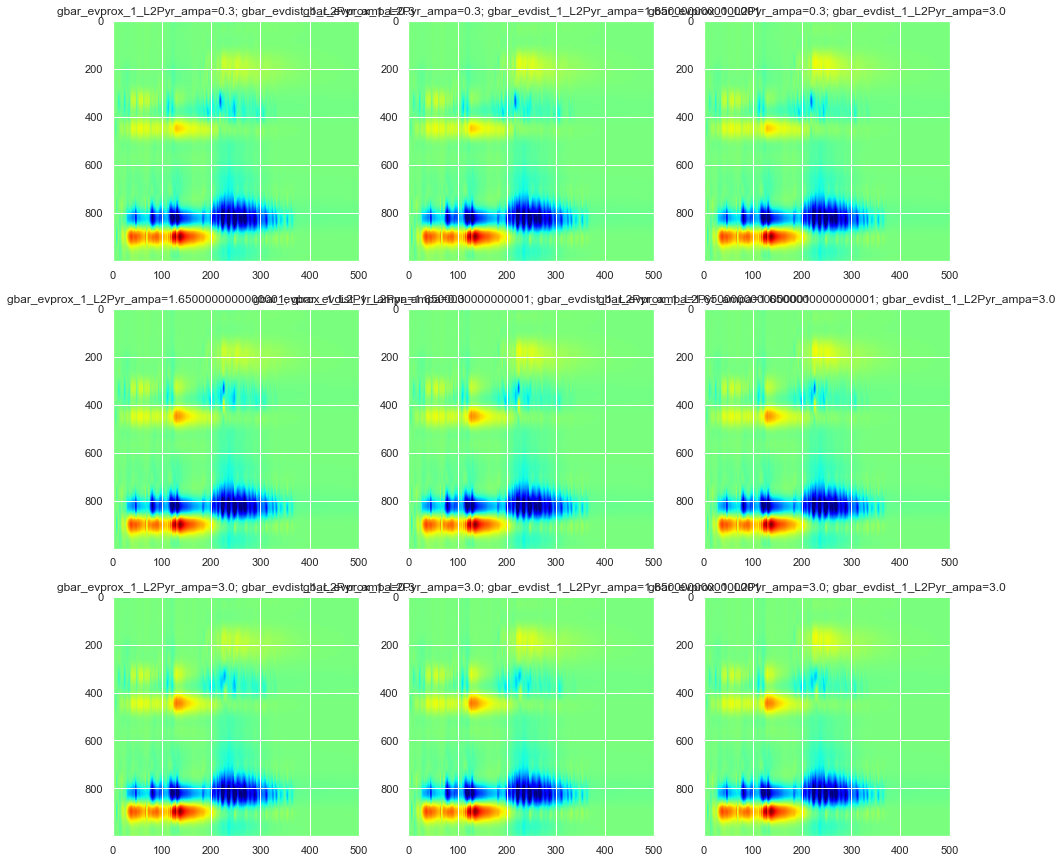

In [6]:
%matplotlib inline

hnn_dir = 'C:/Users/Nick/hnn/data/'
save_dir = 'D:/Jones_Lab/hnn_params/'+ file_prefix +'/'+ file_prefix +'_data/' #directory to store param files

plt.figure(figsize = (15,15))

for idx, f in enumerate(dict_names):
    data_path = hnn_dir + f + '/'
    save_path = save_dir + f + '.csv'
    Z_hnn = csd_functions.csd_interp(data_path,20)
    csd_points = csd_functions.grid2points(Z_hnn)
    np.savetxt(save_path, csd_points, delimiter=',')

    plt.subplot(3,3,idx+1)
    plt.imshow(Z_hnn, interpolation='none', aspect='auto', origin='upper', cmap='jet_r',vmin=Z_hnn.min(), vmax=-Z_hnn.min())

    plt.title('{}={}; {}={}'.format(param_names[0], param_sets[idx][1][0], param_names[1], param_sets[idx][1][1]))
    


plt.show()